# #EXPLORATORY DATA ANALYSIS


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
netflix_data=pd.read_csv("netflix data.csv")
netflix_data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [4]:
netflix_data.shape


(15480, 29)

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [6]:
netflix_data.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

## Top Boxoffice Content

In [7]:
# boxofiice vs other platform
score_columns=[col for col in netflix_data.columns if 'Score' in col]
score_columns.append('Boxoffice')
score_columns.append('Title')
score_columns.append('Actors')
score_columns.append('Director')
score_columns.append('Writer')
score_columns.append('Series or Movie')
df_scores=netflix_data[score_columns]
df_scores=df_scores.dropna(subset=['Boxoffice'])
df_scores['Boxoffice'] = df_scores['Boxoffice'].replace('[\$,]','',regex=True)
df_scores['Boxoffice']=pd.to_numeric(df_scores['Boxoffice'])
df_scores.dtypes
df_scores['Rotten Tomatoes Score'] = df_scores['Rotten Tomatoes Score']/10
df_scores['Metacritic Score']= df_scores['Metacritic Score']/10
df_scores.head()
top20=df_scores.nlargest(20,'Boxoffice')
top20=top20.reset_index()
top20

,index,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Boxoffice,Title,Actors,Director,Writer,Series or Movie
0,13703,4.0,7.8,8.9,7.5,659363944,Titanic,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",James Cameron,James Cameron,Movie
1,10593,3.3,7.0,7.0,5.9,652385625,Jurassic World,"Vincent D'Onofrio, Bryce Dallas Howard, Chris ...",Colin Trevorrow,"Rick Jaffa, Derek Connolly, Amanda Silver, Mic...",Movie
2,14202,4.0,8.0,9.1,6.9,623357910,Avengers Assemble,"Mark Ruffalo, Robert Downey Jr., Chris Evans, ...",Joss Whedon,"Zak Penn, Joss Whedon",Movie
3,14478,4.5,9.0,9.4,8.4,534858444,The Dark Knight,"Michael Caine, Christian Bale, Aaron Eckhart, ...",Christopher Nolan,"Jonathan Nolan, David S. Goyer, Christopher No...",Movie
4,16,2.8,6.5,5.2,5.1,474544677,I,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,Movie
5,244,2.8,6.5,5.2,5.1,474544677,Ill Always Know What You Did Last Summer,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,Movie
6,306,2.8,6.5,5.2,5.1,474544677,Im Home,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,Series
7,997,2.8,6.5,5.2,5.1,474544677,Im Standing on a Million Lives,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,Series
8,1209,2.8,6.5,5.2,5.1,474544677,Im Not Ready for Christmas,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,Movie
9,1249,2.8,6.5,5.2,5.1,474544677,Im losing it,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,Movie


In [37]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Table(header=dict(values=['Title','Boxoffice']),cells=dict(values=[top20['Title'],top20['Boxoffice']],fill_color='lavender'))])

fig.show()

In [138]:
df_scores_long=pd.melt(df_scores,
                      id_vars=['Boxoffice'],
                      value_vars=['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Metacritic Score'],
                      var_name='Platform',
                      value_name='Score')
df_scores_long

,Boxoffice,Platform,Score
0,2122065,Hidden Gem Score,4.3
1,70632,Hidden Gem Score,7.0
2,16263,Hidden Gem Score,6.4
3,20578909,Hidden Gem Score,2.0
4,335451311,Hidden Gem Score,3.5
...,...,...,...
16023,101196,Metacritic Score,5.2
16024,281287133,Metacritic Score,4.5
16025,26414527,Metacritic Score,2.2
16026,36136,Metacritic Score,6.4


## Series or Movie

In [171]:
pd.value_counts(netflix_data['Series or Movie'])

Movie     11697
Series     3783
Name: Series or Movie, dtype: int64

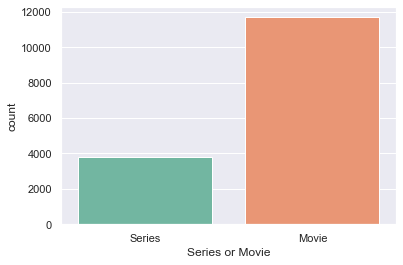

In [166]:
sns.set_theme(style='darkgrid')
barcount=sns.countplot(x='Series or Movie',data=netflix_data,palette='Set2')

In [175]:
netflix_data['Genre'].head(20)

0       Crime, Drama, Fantasy, Horror, Romance
1                                       Comedy
2                              Drama, Thriller
3                                        Drama
4                      Animation, Short, Drama
5                              Comedy, Romance
6                                        Drama
7                                        Crime
8                                        Drama
9                                       Comedy
10                     Comedy, Family, Fantasy
11    Crime, Drama, Fantasy, Mystery, Thriller
12                                       Drama
13                               Comedy, Drama
14                                Short, Drama
15                      Crime, Drama, Thriller
16          Action, Adventure, Fantasy, Sci-Fi
17          Adventure, Drama, Fantasy, Mystery
18                                       Music
19                             Drama, Thriller
Name: Genre, dtype: object

[Text(0, 0, 'Comedy'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Documentary'),
 Text(3, 0, 'Comedy, Drama'),
 Text(4, 0, 'Drama, Romance'),
 Text(5, 0, 'Comedy, Romance'),
 Text(6, 0, 'Comedy, Drama, Romance'),
 Text(7, 0, 'Crime, Drama, Thriller'),
 Text(8, 0, 'Action, Crime, Thriller'),
 Text(9, 0, 'Drama, Thriller'),
 Text(10, 0, 'Crime, Drama'),
 Text(11, 0, 'Action, Crime, Drama, Thriller'),
 Text(12, 0, 'Animation'),
 Text(13, 0, 'Reality-TV'),
 Text(14, 0, 'Horror')]

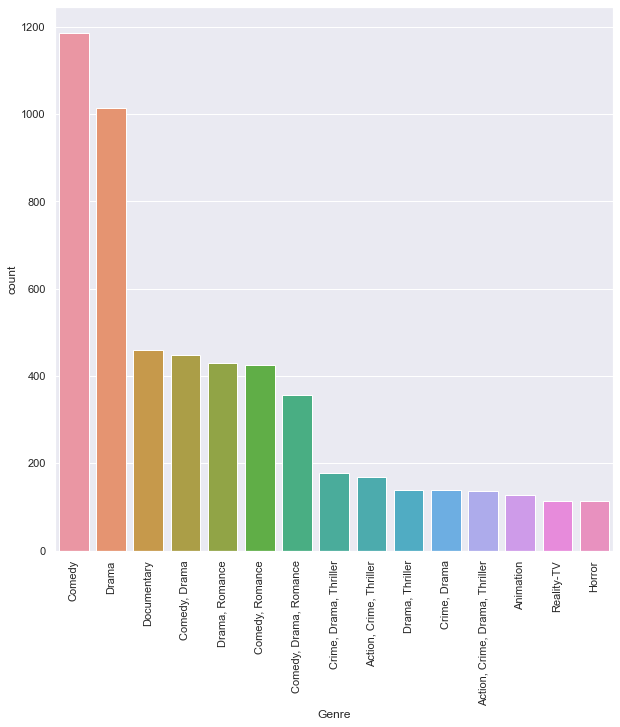

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
genre=sns.countplot(x="Genre",data=netflix_data,order=netflix_data['Genre'].value_counts().index[:15])
genre.set_xticklabels(genre.get_xticklabels(),rotation=90)

It can be easily seen by above plot that most of the content in NETFLIX is in genre"comedy" and "drama".

## year wise analysis


In [48]:
netflix_data['year']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
15475    2015
15476    2015
15477    2015
15478    2015
15479    2015
Name: year, Length: 15480, dtype: int64

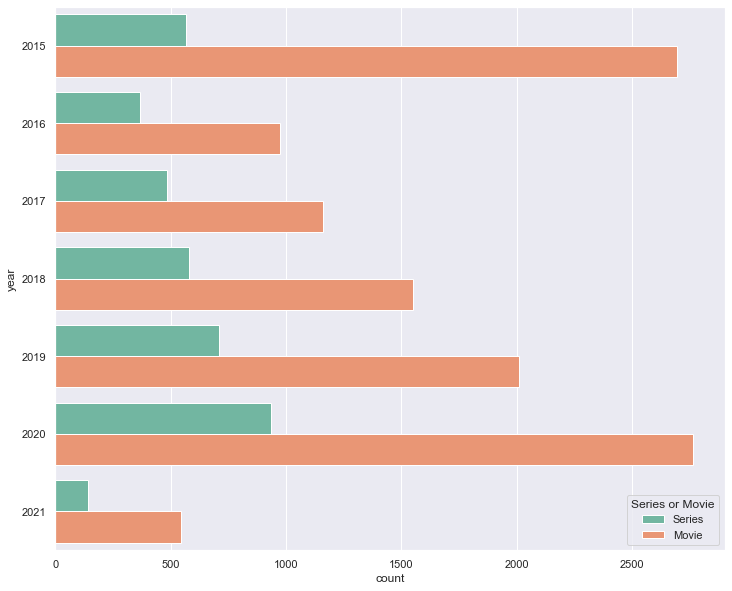

In [26]:
netflix_data['year']=pd.DatetimeIndex(netflix_data['Netflix Release Date']).year
netflix_data['year']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax=sns.countplot(y='year',data=netflix_data,hue='Series or Movie',palette='Set2')


In 2020,content uploaded on NETFLIX whether it is movie or series is higher than all the other years.

# Duration of contents

In [106]:
netflix_data['Runtime'].value_counts()

1-2 hour        9121
< 30 minutes    3996
> 2 hrs         2028
30-60 mins       334
Name: Runtime, dtype: int64

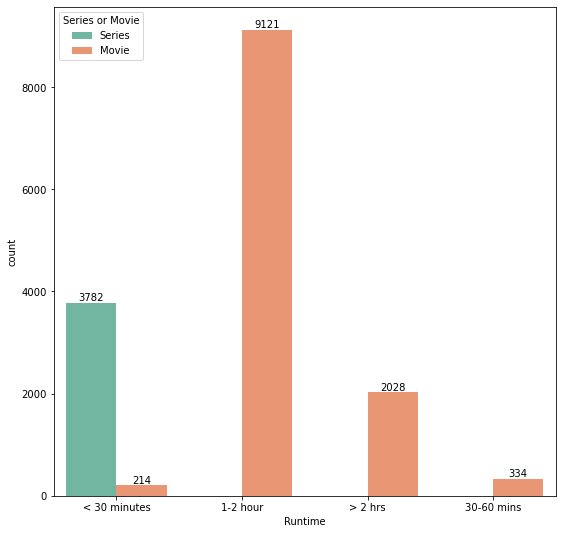

In [20]:
plt.figure(figsize=(9,9))
DURATION=sns.countplot(x='Runtime',data=netflix_data,hue='Series or Movie',palette='Set2')
for containers in DURATION.containers:
    DURATION.bar_label(containers)


this can be seen very clearly that most of the content is having duration between 1-2 hours

## Languages

[Text(0, 0, 'English'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Korean'),
 Text(3, 0, 'Spanish'),
 Text(4, 0, 'Hindi'),
 Text(5, 0, 'English, Spanish'),
 Text(6, 0, 'French'),
 Text(7, 0, 'German'),
 Text(8, 0, 'English, French'),
 Text(9, 0, 'Mandarin')]

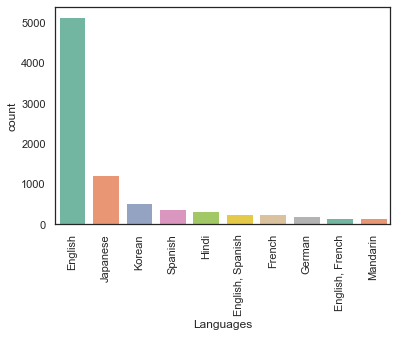

In [14]:
LANGUAGES=netflix_data['Languages'].str.split(",")
plt.Figure(figsize=(8,8))
sns.set_theme(style='white')
languages=sns.countplot(x='Languages',data=netflix_data,palette="Set2",order=netflix_data["Languages"].value_counts().index[:10])
languages.set_xticklabels(languages.get_xticklabels(),rotation=90)

"English" is the language in which most of the content is uploaded on netflix. 

In [24]:
netflix_data["Languages"].head(10)

0                       Swedish, Spanish
1                                English
2                                English
3                                Turkish
4                                English
5                                   Thai
6                                 Polish
7                                 Polish
8                                Swedish
9    Swedish, English, German, Norwegian
Name: Languages, dtype: object

## View Rating

<AxesSubplot:xlabel='View Rating', ylabel='count'>

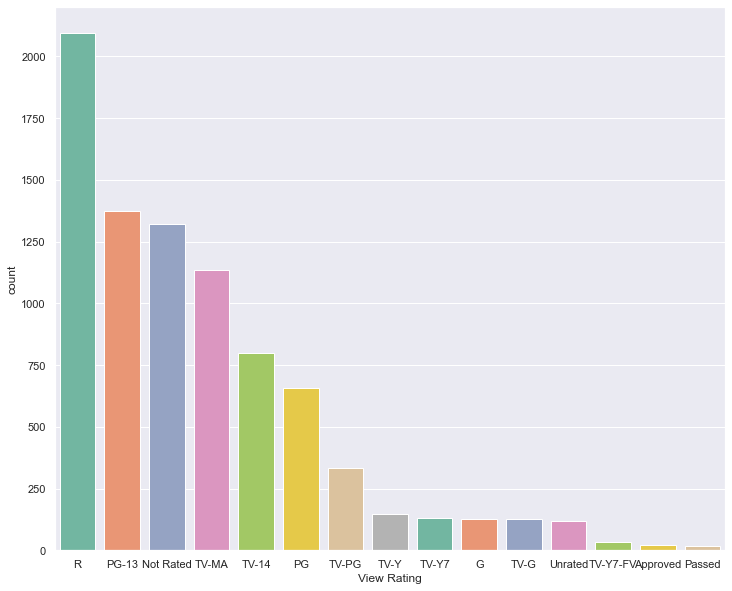

In [52]:
rating=pd.unique(netflix_data['View Rating'])
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(x="View Rating",data=netflix_data,palette="Set2",order=netflix_data["View Rating"].value_counts().index[0:15])

## Awards recieved and nominated for

In [56]:
award=list(netflix_data["Awards Received"])
award=award.append("Awards Nominated For")
award.head(20)

AttributeError: 'NoneType' object has no attribute 'head'

TypeError: Column 'Boxoffice' has dtype object, cannot use method 'nlargest' with this dtype

In [122]:
netflix_data.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

## Awards nominated for and awards recieved

In [6]:
subject={1:'a',2:'b',3:'c',4:'d'}
dict=subject.items()

AttributeError: 'dict_items' object has no attribute 'dtype'

In [7]:
filledna=netflix_data.fillna('')
filledna.head(10)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,,
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,,,...,2021-03-04,,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,,
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,,...,2021-03-04,,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,,
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...",...,2021-03-03,,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,,,...,2021-03-03,,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,,
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,,,...,2021-03-03,,https://www.netflix.com/watch/81307482,https://www.imdb.com/title/tt1973421,An enigmatic commissioner joins the Warsaw Pol...,107.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BZWYyYW...,,
8,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m

In [9]:
def clean_data(x):
     return str.lower(x.replace(" ", ""))
features=['Title','Genre','Director','Writer','Production House','Summary']
filledna = filledna[features]
for feature in features:
    filledna[feature]=filledna[feature].apply(clean_data)
filledna.head()


,Title,Genre,Director,Writer,Production House,Summary
0,letsfightghost,"crime,drama,fantasy,horror,romance",tomasalfredson,johnajvidelindqvist,"canal+,sandrewmetronome",amedstudentwithasupernaturalgifttriestocashino...
1,howtobuildagirl,comedy,cokygiedroyc,caitlinmoran,"film4,monumentalpictures,lionsgate","whennerdyjohannamovestolondon,thingsgetoutofha..."
2,centigrade,"drama,thriller",brendanwalsh,"brendanwalsh,daleynixon",,"trappedinafrozencarduringablizzard,apregnantwo..."
3,anne+,drama,,,,"uponmovingintoanewplace,a20-somethingrunsintoa..."
4,moxie,"animation,short,drama",stephenirwin,,,inspiredbyhermomsrebelliouspastandaconfidentne...


In [10]:
def create_soup(x):
    return x['Title']+' '+x['Director']+' '+x['Writer']+' '+x['Summary']+' '+x['Production House']
filledna['soup']=filledna.apply(create_soup,axis=1)
filledna['soup']

0        letsfightghost tomasalfredson johnajvidelindqv...
1        howtobuildagirl cokygiedroyc caitlinmoran when...
2        centigrade brendanwalsh brendanwalsh,daleynixo...
3        anne+   uponmovingintoanewplace,a20-somethingr...
4        moxie stephenirwin  inspiredbyhermomsrebelliou...
                               ...                        
15475    k-popextremesurvival   seungyeondecidestochase...
15476    dreamworksshreksswampstories   shrekcelebrates...
15477    dreamworkshappyholidaysfrommadagascar   madaga...
15478    dreamworksholidayclassics   joinyourdreamworks...
15479    dreamworkskungfupandaawesomesecrets   inthispa...
Name: soup, Length: 15480, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
count=CountVectorizer(stop_words='english')
count_matrix=count.fit_transform(filledna['soup'])
count_matrix
cosine_sim2=cosine_similarity(count_matrix)

In [12]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['Title'])
indices

Title
letsfightghost                               0
howtobuildagirl                              1
centigrade                                   2
anne+                                        3
moxie                                        4
                                         ...  
k-popextremesurvival                     15475
dreamworksshreksswampstories             15476
dreamworkshappyholidaysfrommadagascar    15477
dreamworksholidayclassics                15478
dreamworkskungfupandaawesomesecrets      15479
Length: 15480, dtype: int64

In [16]:
#def recommendation_new(Title,cosine_sim=cosine_sim):
Title="The Dark Knight"
Title=Title.replace(' ','').lower()
idx=indices[Title]
    #get the pairwise similarity score with that movie
sim_scores=list(enumerate(cosine_sim2[idx]))
    #sort the movies based on similarity score
sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
sim_scores
    #get the index of 10 most similar movie
sim_scores=sim_scores[1:11]
    #get the movie indices
movie_indices=[i[0] for i in sim_scores]
    #return top 10 similar movies 
netflix_data['Title'].iloc[movie_indices]
#recommendation_new('How To Build A Girl',cosine_sim2)


13360    The Dark Knight Rises
14480            Batman Begins
12034             Interstellar
14331                Inception
14591             The Prestige
13322             Man of Steel
14086                  Memento
8440                   Dunkirk
12009               The Unborn
15413           Blade: Trinity
Name: Title, dtype: object

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
netflix_data['Summary']=netflix_data['Summary'].fillna('')
tfidf_matrix=tfidf.fit_transform(netflix_data['Summary'])
tfidf_matrix.shape


(15480, 25528)

In [5]:
#import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
#compute cosine similarity
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)
indices=pd.Series(netflix_data.index,index=netflix_data['Title'])
indices.head()

Title
Lets Fight Ghost       0
HOW TO BUILD A GIRL    1
Centigrade             2
ANNE+                  3
Moxie                  4
dtype: int64

In [6]:
Title='The Dark Knight'
idx=indices[Title]
#get the pairwise siilarity score with all movie
sim_score=list(enumerate(cosine_sim[idx]))
sim_score=sorted(sim_score,key=lambda x:x[1], reverse=True)
sim_score=sim_score[1:11]
#get the movie indices
movie_indices=[i[0] for i in sim_score]
netflix_data['Title'].iloc[movie_indices]


10359             Batman: The Killing Joke
647                          Youre My Home
15277         Batman: Mask of the Phantasm
4442     The LEGO Movie 2: The Second Part
12267                             Fracture
15276                       Batman Forever
7175                 Clandestine Childhood
2014                          The Informer
4293                             Underdogs
1427                   The Blue Elephant 2
Name: Title, dtype: object

In [38]:
import datetime
release_date=netflix_data["Netflix Release Date"].dropna()
release_date['year']=release_date.apply(lambda x: x.split('-')[0])
release_date['month']=release_date.apply(lambda x: x.str.split('-')[1])
#release_date['month']=pd.to_datetime(release_date,format="%Y-%m-%d").dt.month_name()
release_date['month'].head()
#release_date['year']=pd.DatetimeIndex(release_date).month

AttributeError: 'str' object has no attribute 'str'